<h4>Oscar-Winning Directors Analysis</h4>
<h6>In this analysis, we will be examining the trends in gender and race among Oscar-winning directors from 1930 to 2019.
</h6>
</p>

<h5>Dataset</h5>
<h6>The dataset used for this analysis is the "Oscar Winners" dataset, which is publicly available on Kaggle.

Let's begin by importing the necessary libraries and loading in the dataset:

</h6>

In [22]:
import pyforest

In [23]:
df = pd.read_csv(r"C:\Users\User\Documents\OSCARS PROJECT\Oscar Winners - Director.csv")

<IPython.core.display.Javascript object>

In [24]:
df.head()

,index,Year,Gender,Race,Director(s),Film,Nomination/Winner
0,0,1927/28,Male,White,Frank Borzage (Dramatic Picture),7th Heaven,Winner
1,1,1927/28,Male,White,Herbert Brenon(Dramatic Picture),Sorrell and Son,Nomination
2,2,1927/28,Male,White,King Vidor(Dramatic Picture),The Crowd,Nomination
3,3,1927/28,Male,White,Lewis Milestone (Comedy Picture),Two Arabian Knights,Winner
4,4,1927/28,Male,White,Ted Wilde(Comedy Picture),Speedy,Nomination


In [25]:
df.tail()

,index,Year,Gender,Race,Director(s),Film,Nomination/Winner
451,451,2019,Male,White,Sam Mendes,1917,Nomination
452,452,2019,Male,White,Todd Phillips,Joker,Nomination
453,453,2019,Male,White,Martin Scorsese,The Irishman,Nomination
454,454,2019,Male,White,Quentin Tarantino,Once Upon a Time in Hollywood,Nomination
455,455,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.shape

(456, 7)

In [27]:
df.describe()

,index
count,456.00000
mean,227.50000
std,131.78012
min,0.00000
25%,113.75000
50%,227.50000
75%,341.25000
max,455.00000


<h5>Data Cleaning and Preparation<h5>
<h6>This step was taken to ensure that the dataset was ready for analysis and to minimize any potential errors or biases that could affect the results.</h6>

In [28]:
df.set_index('index', inplace=True)

In [29]:
df.isnull().sum()

Year                 1
Gender               1
Race                 1
Director(s)          1
Film                 1
Nomination/Winner    1
dtype: int64

In [30]:
df = df.drop(455)

In [31]:
df.isnull().sum()

Year                 0
Gender               0
Race                 0
Director(s)          0
Film                 0
Nomination/Winner    0
dtype: int64

In [32]:
df.dtypes

Year                 object
Gender               object
Race                 object
Director(s)          object
Film                 object
Nomination/Winner    object
dtype: object

In [33]:
df['Year']=df['Year'].astype(str).str.strip()
df[['start_year', 'end_year']] = df['Year'].str.split('/', expand=True)
df['end_year'].fillna(df['start_year'], inplace=True)
df['clean_year'] = df.apply(lambda x: x['end_year'] if len(x['start_year']) == 2 else x['start_year'], axis=1)
df['Year'] = df['clean_year']
print(df.head())

       Year Gender   Race                       Director(s)  \
index                                                         
0      1927   Male  White  Frank Borzage (Dramatic Picture)   
1      1927   Male  White  Herbert Brenon(Dramatic Picture)   
2      1927   Male  White      King Vidor(Dramatic Picture)   
3      1927   Male  White  Lewis Milestone (Comedy Picture)   
4      1927   Male  White         Ted Wilde(Comedy Picture)   

                      Film Nomination/Winner start_year end_year clean_year  
index                                                                        
0               7th Heaven            Winner       1927       28       1927  
1          Sorrell and Son        Nomination       1927       28       1927  
2                The Crowd        Nomination       1927       28       1927  
3      Two Arabian Knights            Winner       1927       28       1927  
4                   Speedy        Nomination       1927       28       1927  


In [34]:
df.drop(['start_year', 'end_year', 'clean_year'], axis=1, inplace=True)
print(df.head())

       Year Gender   Race                       Director(s)  \
index                                                         
0      1927   Male  White  Frank Borzage (Dramatic Picture)   
1      1927   Male  White  Herbert Brenon(Dramatic Picture)   
2      1927   Male  White      King Vidor(Dramatic Picture)   
3      1927   Male  White  Lewis Milestone (Comedy Picture)   
4      1927   Male  White         Ted Wilde(Comedy Picture)   

                      Film Nomination/Winner  
index                                         
0               7th Heaven            Winner  
1          Sorrell and Son        Nomination  
2                The Crowd        Nomination  
3      Two Arabian Knights            Winner  
4                   Speedy        Nomination  


<h5>Distribution of Features</h5>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

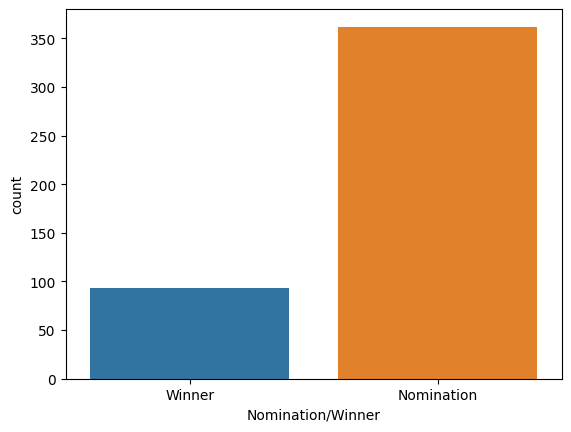

In [35]:
sns.countplot(data=df, x="Nomination/Winner")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

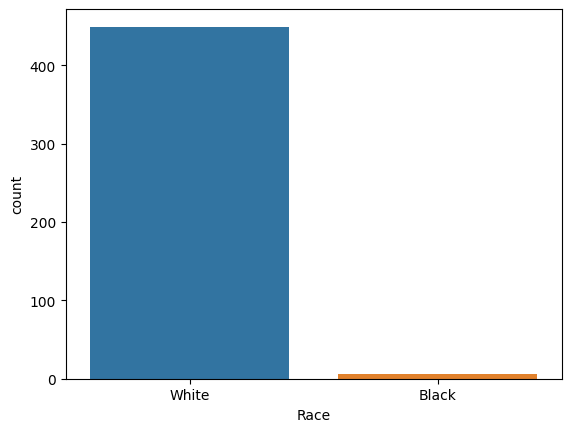

In [36]:
sns.countplot(data=df, x='Race')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

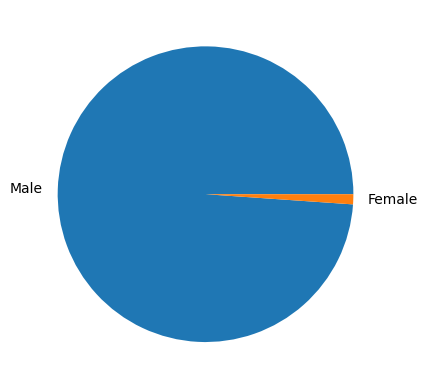

In [37]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

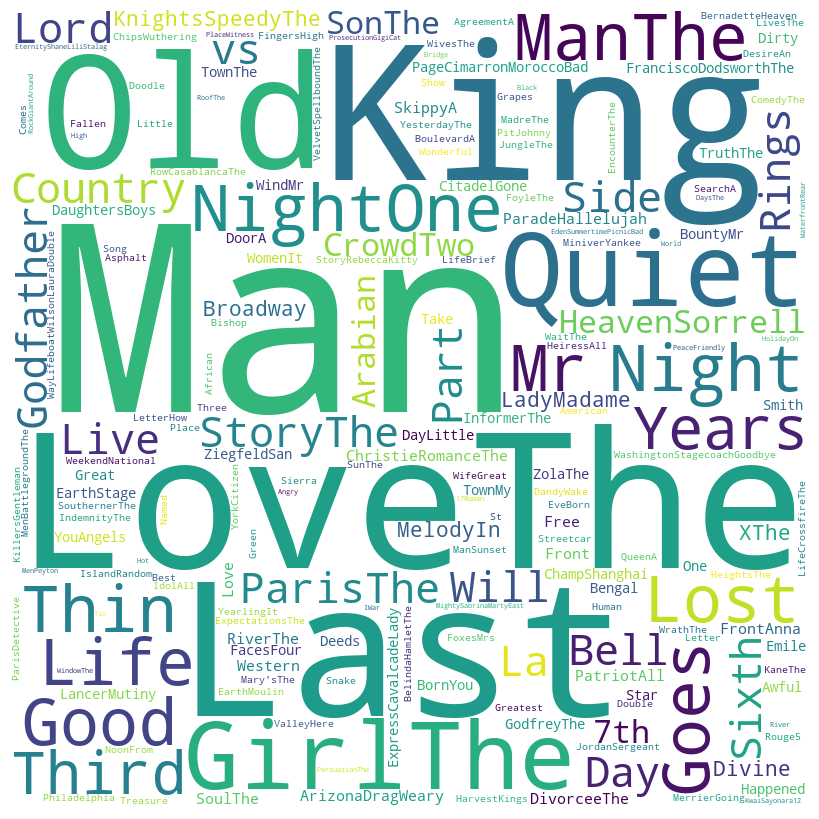

In [48]:
from wordcloud import WordCloud
text = ''.join(df['Film'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

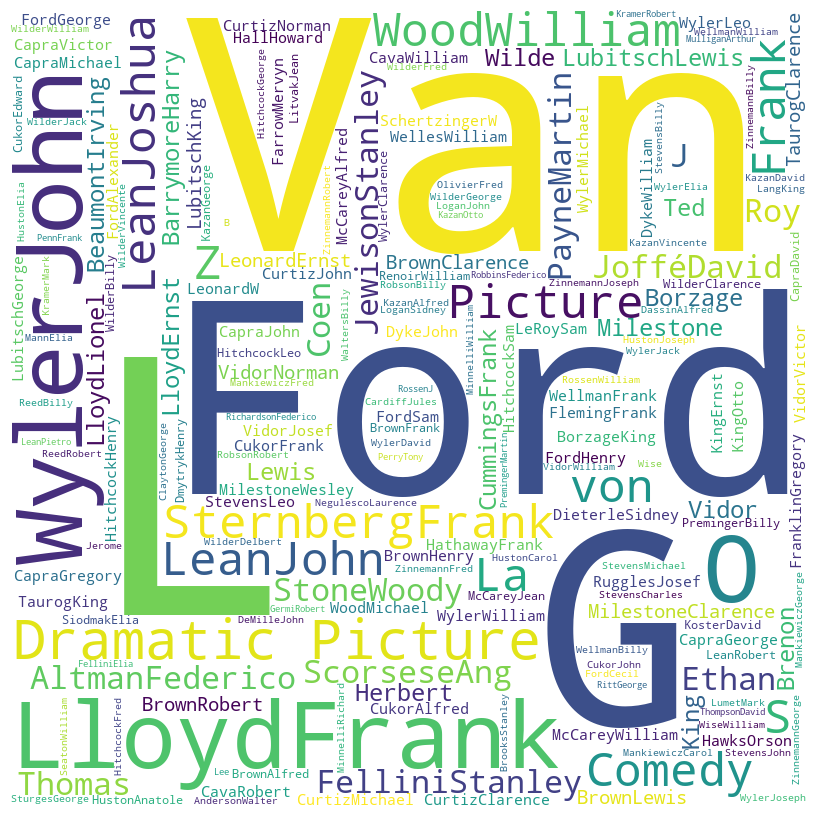

In [49]:
from wordcloud import WordCloud
text = ''.join(df['Director(s)'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()